In [1]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../processed_datasets/merged_aqi_revenue_geocode_dataset.csv")

scaler = MinMaxScaler()
df[["AQI_scaled", "Rev_scaled"]] = scaler.fit_transform(
    df[["Average_AQI", "Total_Rev_Prog_Desc"]]
)

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["AQI_scaled", "Rev_scaled"]])


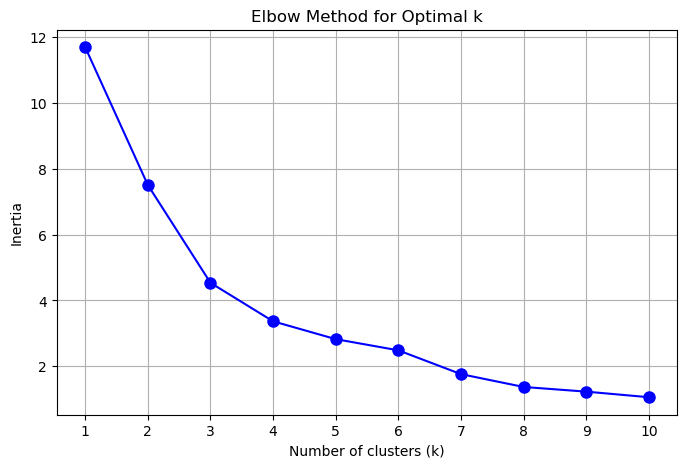

In [11]:
import matplotlib.pyplot as plt# Prepare features and scale
features = df[['Average_AQI', 'Total_Rev_Prog_Desc']].copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Compute inertia for k = 1 to 10
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

In [6]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Average_AQI",
    y="Total_Rev_Prog_Desc",
    color="Cluster",
    hover_name="City",
    hover_data=["CBSA"],
    labels={
        "Average_AQI":"Average AQI",
        "Total_Rev_Prog_Desc":"Total Nonprofit Revenue"
    },
    title="City Clusters by Air Quality & Nonprofit Revenue"
)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [7]:
profile = df.groupby("Cluster").agg(
    Avg_AQI     = ("Average_AQI",     "mean"),
    Median_AQI  = ("Average_AQI",     "median"),
    Avg_Revenue = ("Total_Rev_Prog_Desc", "mean"),
    Median_Rev  = ("Total_Rev_Prog_Desc", "median"),
    Count       = ("City",            "count")
).reset_index()
profile


,Cluster,Avg_AQI,Median_AQI,Avg_Revenue,Median_Rev,Count
0,0,37.868095,38.306306,1.005963e+07,6945848.0,133
1,1,50.283325,50.186301,6.877551e+07,62561656.0,29
2,2,23.122683,25.428571,5.809176e+06,4892928.0,41
3,3,48.484158,46.884932,1.167138e+07,8981908.0,99


In [8]:
import plotly.express as px

# Make sure your df still has Latitude, Longitude, City (or CITY), CBSA and Cluster columns
city_col = "City" if "City" in df.columns else "CITY"

fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Cluster",
    hover_name=city_col,
    hover_data=["CBSA"],
    zoom=4,
    height=600,
    mapbox_style="open-street-map",
    title="Geographic Clusters of Cities"
)

fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.show()


/var/folders/qy/mrz93f6x39d_jlmv1k3_phqw0000gn/T/ipykernel_12983/4116556413.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

